In [4]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [5]:
def osc(y_v, t, omega2=1):
    dy = y_v[1]
    dv = -omega2*y_v[0]
    return array([dy, dv])

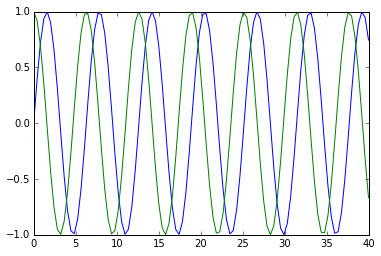

In [6]:
t = linspace(0,40, 100)
ini = array([0,1])

sol = odeint(osc, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

In [7]:
def root_trayect(func, pto_i, ti, error=1e-5):
    while abs(pto_i[0])>error:
        ti1 = ti - pto_i[0]/pto_i[1]
        sol = odeint(func, pto_i, [ti,ti1])
        ti = ti1
        pto_i = sol[-1]
    return ti, pto_i

In [8]:
ind = 10

ti = t[ind]
pto_i = sol[ind]
root_trayect(osc, pto_i, ti, error=1e-5)

(3.1415913642546212, array([  1.39153185e-06,  -9.99999892e-01]))

In [9]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

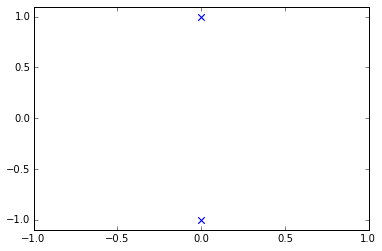

In [10]:
xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')

In [11]:
def osc_fric(y_v, t, omega2=1, gamma=0.1):
    dy = y_v[1]
    dv = -omega2*y_v[0] - gamma*y_v[1]
    return array([dy, dv])

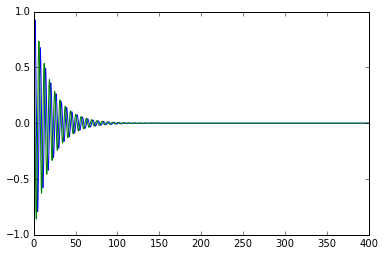

In [12]:
t = linspace(0, 400, 10000)
ini = array([0,1])

sol = odeint(osc_fric, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

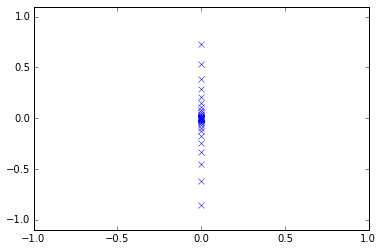

In [13]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc_fric, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')

Consideremos el sistema de dos partículas de masas $m_1$ y $m_2$ cuyo hamiltoniano esta dado por: 
$$E=H(x,y,p_x,p_y)=\frac{1}{2}(\frac{p_x^2}{m_1}+\frac{p_y^2}{m_2})+V(x,y)$$.

Si $V(x,y)=-\frac{k}{r}=-\frac{k}{\sqrt{x^2+y^2}}$, entonces $E=\frac{1}{m_1}\frac{1}{2}(p_x^2+\epsilon p_y^2)-\frac{k}{\sqrt{x^2+y^2}}$, en donde definimos $\epsilon=\frac{m_1}{m_2}$. Con esto, podemos reescalar el problema para eliminar el factor de $m_1$ en la energía cinética. Además, al hacer un reescalamiento del tiempo se puede eliminar la constante $k*m_1$ en el potencial. De este modo el sistema se puede reducir simplemente a un hamiltoniano dado por:

$$E'=\frac{1}{2}(p_x^2+\epsilon p_y^2)-\frac{1}{\sqrt{x^2+y^2}}$$.

Observemos que, si $\epsilon=1$, se tiene el mismo hamiltoniano que el del problema de Kepler.

De aquí se obtiene que $\vec{F}=-\frac{\hat{r}}{r^2}=-\frac{\vec{r}}{r^3}=m(\dot{v}_x\hat{i}+\dot{v}_y\hat{j})=-\frac{x\hat{i}+y\hat{j}}{r^3}$,donde $\dot{x}=v_x$ y $\dot{y}=\epsilon v_y$ Entonces, $\begin{cases} \dot{p}_x = -\frac{x}{r^3} \\ \dot{p}_y = - \frac{y}{r^3} \end{cases}$.

In [14]:
def ec_mov(x_p,t,epsilon=1.):
    # x_p = x,y,px,py
    r32 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    dx = x_p[2]
    dy = x_p[3]*epsilon
    dpx = -x_p[0]/r32
    dpy = -x_p[1]/r32
    return array([dx,dy,dpx,dpy])

def energia(x_p,epsilon=1.):
    r = (x_p[0]**2 + x_p[1]**2)**(0.5)
    E = 0.5*(x_p[2]**2 + epsilon*x_p[3]**2) - 1./r
    return E

def cond_ini(alfa,var=0.001):
    angulo = alfa + var*(2*rand() - 1)
    x = cos(angulo)
    y = sin(angulo)
    return array([x,y,0.25,0])

Tomamos varios puntos iniciales dentro de un circulo con la misma energia potencial. Al jugar con los valores de $\epsilon$ podemos ver que entre más se aleje el valor de 1, el sistema será más caótico.

E=  -0.6875 E_f= -0.687500001549
E=  -0.6875 E_f= -0.687500001341
E=  -0.6875 E_f= -0.687500001763
E=  -0.6875 E_f= -0.687500013068
E=  -0.6875 E_f= -0.687499997068
E=  -0.6875 E_f= -0.687500000583
E=  -0.6875 E_f= -0.687499999305
E=  -0.6875 E_f= -0.687500002226
E=  -0.6875 E_f= -0.687499998916
E=  -0.6875 E_f= -0.687499964469
E=  -0.6875 E_f= -0.687500001405
E=  -0.6875 E_f= -0.687499996996


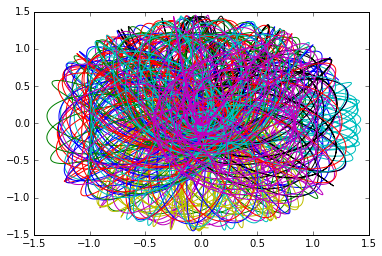

In [15]:
t= arange(0,100,.0001)
for i in xrange(12):
    eps=1.5
    pto_ini=[cos(i),sin(i),.5,.5]
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-12)
    print "E= ", energia(pto_ini,eps), "E_f=", energia(sol[-1],eps)
    plot(sol[:,0],sol[:,1])
show()

Ahora, tomamos varias condiciones iniciales cercanas y las integramos para ver qué tanto se separan las trayectorias.

C:\Program Files\Anaconda\lib\site-packages\scipy\integrate\odepack.py:156: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars


E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf
E=  -0.96875 E_f= -inf


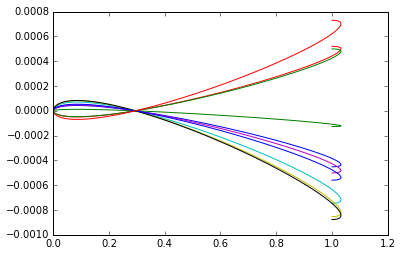

In [16]:
t=arange(0,100,.0001)
eps=1.2
for i in xrange(10):
    pto_ini=cond_ini(0) #hacer variaciones en tornos del angulo cero
    sol=odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-9,rtol=1e-9)
    plot(sol[:,0],sol[:,1])
    print "E= ", energia(pto_ini,eps), "E_f=",energia(sol[-1],eps)
show()

Observamos que entre más alejado sea el valor de $\epsilon$ de 1, las soluciones se alejan cada vez más entre sí,i.e. el sistema es mucho más caótico.

Ahora, sabemos que en coordenadas polares la energía esta dada por: $$E'=\frac{1}{2}(p_{\rho}^2+\frac{p_{\theta}^2}{\rho^2})-\frac{1}{\rho}$$

Esto nos dice que $\theta$ es una coordenada cícicla,  por lo que $\frac{\partial E'}{\partial \theta}=p_{\theta}$ es constante. Además, $\theta$ es $2\pi$-periódica, por lo que el espacio fase solo dependerá de $\rho,p_{\rho},\theta$ y bastará con barrer $\theta$ entre $0$ y $2\pi$.

In [2]:
def p_rho(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3],
    r = (x**2 + y**2)**(0.5)
    p_r = (x*px + y*py)/r
    return p_r,r

E= -0.96875 E_f=  -0.968750249522
E= -0.96875 E_f=  -0.968750249619
E= -0.96875 E_f=  -0.968750203806
E= -0.96875 E_f=  -0.968750256893
E= -0.96875 E_f=  -0.968750259007
E= -0.96875 E_f=  -0.96875021471
E= -0.96875 E_f=  -0.968750244207
E= -0.96875 E_f=  -0.968750277818
E= -0.96875 E_f=  -0.968750248268
E= -0.96875 E_f=  -0.96875026145


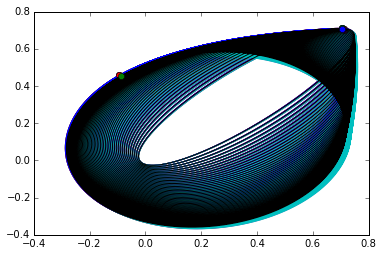

In [21]:
t = arange(0,120,0.0001)
eps = 1.02
for i in range(10):
    pto_ini = cond_ini(pi/4,0.01)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    plot(sol[:,0],sol[:,1])
    plot(pto_ini[0],pto_ini[1],'o')
    plot(sol[-1,0],sol[-1,1],'o')
    print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps,)

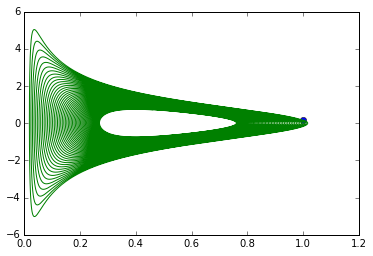

In [22]:
pr,r=p_rho(sol)
plot(r[0],pr[0],'o')
plot(r,pr)
show()

E= -0.96875 E_f=  -0.968750707969
E= -0.96875 E_f=  -0.968751817816
E= -0.96875 E_f=  -0.96875077258
E= -0.96875 E_f=  -0.968750854647
E= -0.96875 E_f=  -0.96875129223
E= -0.96875 E_f=  -0.968750105212
E= -0.96875 E_f=  -0.96875062727
E= -0.96875 E_f=  -0.968750866925
E= -0.96875 E_f=  -0.968750968658
E= -0.96875 E_f=  -0.968751867874


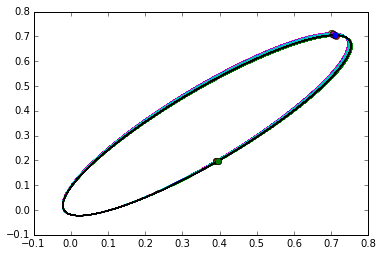

In [23]:
t = arange(0,120,0.0001)
eps = 1
for i in range(10):
    pto_ini = cond_ini(pi/4,0.01)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    plot(sol[:,0],sol[:,1])
    plot(pto_ini[0],pto_ini[1],'o')
    plot(sol[-1,0],sol[-1,1],'o')
    print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps,)

Hacemos un mapeo de Poincare con el método de Newton en la coordenada x. Se fija el punto en el que la partícula 1, sobre el eje x, cruza el origen.

In [29]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0]) > error :
        tip1 = ti - (pto_i[0]/pto_i[2])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

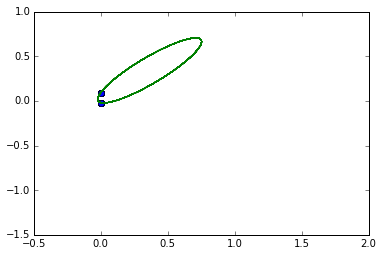

In [30]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(ec_mov,sol[i],t[i])
        j+=1
        
raices,puntos = raices[0:j],puntos[0:j]
xlim(-0.5,2)
ylim(-1.5,1)
plot(puntos[:,0],puntos[:,1],'o')
plot(sol[:,0],sol[:,1])

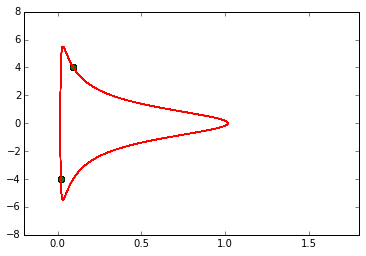

In [31]:
pr,r = p_rho(puntos)
xlim(-0.2,1.8),ylim(-8,8)
plot(r[0],pr[0],'o')
plot(r,pr,'o')
pr,r = p_rho(sol)
plot(r,pr)
show()

Tomamos $\epsilon=1$.

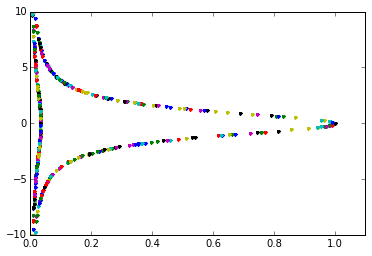

In [32]:
t = arange(0,10,0.0001)
N_trayectorias,eps = 300,1.

for i in range(N_trayectorias):
    pto_ini = cond_ini(pi/4,pi)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    #print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps)
    num = len(t)
    raices,puntos = zeros(num),zeros((num,4))
    j=0
    for k in range(len(t)-1):
        if (sol[k][0]*sol[k+1][0]) < 0:
            raices[j],puntos[j] = root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos = raices[0:j],puntos[0:j]
    pr,r = p_rho(puntos)
    xlim(-0.,1.1)
    ylim(-10,10)
    plot(r,pr,'.')
show()

In [ ]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(ec_mov,sol[i],t[i])
        j+=1
        
raices,puntos = raices[0:j],puntos[0:j]
xlim(-0.5,2)
ylim(-1.5,1)
plot(puntos[:,0],puntos[:,1],'o')
plot(sol[:,0],sol[:,1])

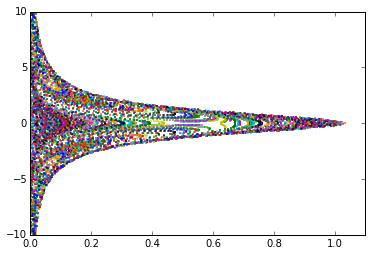

In [33]:
t = arange(0,100,0.0001)
N_trayectorias,eps = 200,1.1

for i in range(N_trayectorias):
    pto_ini = cond_ini(pi/4,pi)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    #print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps)
    num = len(t)
    raices,puntos = zeros(num),zeros((num,4))
    j=0
    for k in range(len(t)-1):
        if (sol[k][0]*sol[k+1][0]) < 0:
            raices[j],puntos[j] = root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos = raices[0:j],puntos[0:j]
    pr,r = p_rho(puntos)
    xlim(-0.,1.1)
    ylim(-10,10)
    plot(r,pr,'.',markersize=2)
show()